In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[](http://)

# **Educational Project for Visualizing a Dataset**

In this project, we aim to visualize the data of a dataset.
The dataset for this project has been generated by us in a fictional manner using **numpy** therefore, the accuracy of the database is not the focus.

We will be utilizing libraries such as **matplotlib** or **seaborn** for data **visualizati**

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [77]:
import warnings
# Suppress UserWarning from Seaborn
warnings.filterwarnings("ignore", category=UserWarning)

Definition of a domain for data

In [90]:
names = [
    "John", "Emma", "Liam", "Olivia", "Noah", "Ava", "William", "Sophia", "James", "Isabella",
    "Oliver", "Mia", "Benjamin", "Amelia", "Elijah", "Harper", "Lucas", "Evelyn", "Alexander", "Luna"
]

nationalities = [
    "USA", "China", "Brazil", "Russia", "India", "Nigeria", "Japan", "Germany", "Egypt", "Australia",
    "Canada", "South Korea", "Mexico", "France", "Turkey", "United Kingdom", "South Africa", "Saudi Arabia",
    "Argentina", "Iran"
]

Educational = ['Diploma','Bachelor','Master', 'Ph.D','Postdoct']

number=250

# **Create DataFrame**

First we create a dictionary to generate random data and convert it to data frame by pandas

In [115]:
datadic={
    'Names':np.random.choice(names,number),
    'Age':np.random.randint(19,55,number),
    'Sex':np.random.choice(["Female","Male"],number),
    'Height':np.around(np.random.uniform(1.1,2.1,number),2),
    'Weight':np.random.randint(55,135,number),
    'Education':np.random.choice(Educational , number),
    'Nationalities':np.random.choice(nationalities,number),
    'Incom':np.random.randint(2000,15000,number),
     'Marital_status':np.random.choice(["Single","Married"],number),
}

data = pd.DataFrame(datadic)

**overview of the dataset.**

First we get the general information from the dataset

In [95]:
data.head()

,Names,Age,Sex,Height,Weight,Education,Nationalities,Incom,Marital_status
0,James,23,Female,1.65,56,Postdoct,United Kingdom,12787,Single
1,Liam,42,Male,1.88,99,Diploma,USA,5937,Married
2,Liam,37,Female,1.15,65,Diploma,Egypt,4665,Married
3,Elijah,28,Male,2.07,93,Ph.D,Nigeria,13121,Single
4,Elijah,43,Female,1.19,116,Diploma,Argentina,14159,Single


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Names           250 non-null    object 
 1   Age             250 non-null    int64  
 2   Sex             250 non-null    object 
 3   Height          250 non-null    float64
 4   Weight          250 non-null    int64  
 5   Educational     250 non-null    object 
 6   Nationalities   250 non-null    object 
 7   Incom           250 non-null    int64  
 8   Marital_status  250 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 17.7+ KB


# data visualization
**First, we observe an overview of the dataset to gain a accurate understanding of the combinations and correlations between the features**

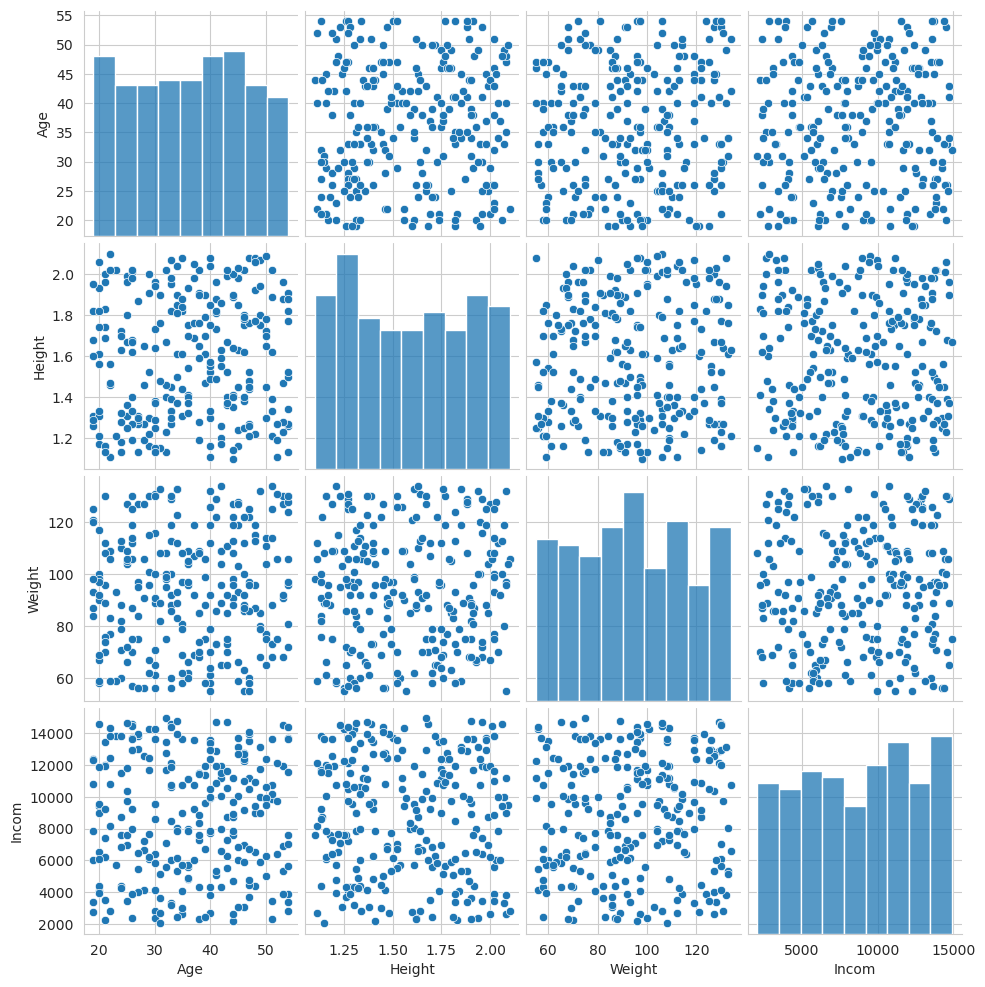

In [82]:
sns.pairplot(data)



From the dataset how many gentlemen or ladies are single or married
This is done with the help of the **barchart**** chart

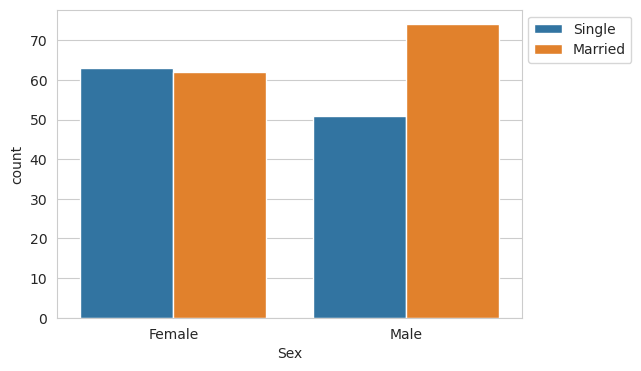

In [96]:
plt.figure(figsize=(6, 4))
ax =sns.countplot(data=data , x=data['Sex'],hue=data["Marital_status"])
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

Income of individuals according to their age and sex

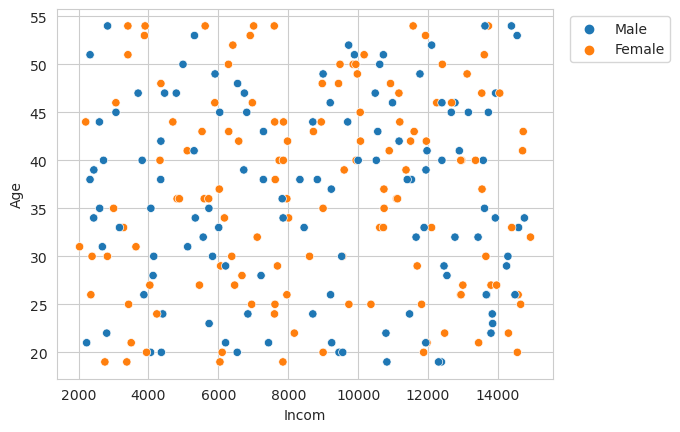

In [84]:
ax= sns.scatterplot(data=data,x=data['Incom'],y=data['Age'],hue=data['Sex'] )
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

**See the two graphs side by side and do a review of the data.**

Of the sexes, men and women are married or single, What is their income based on their age?

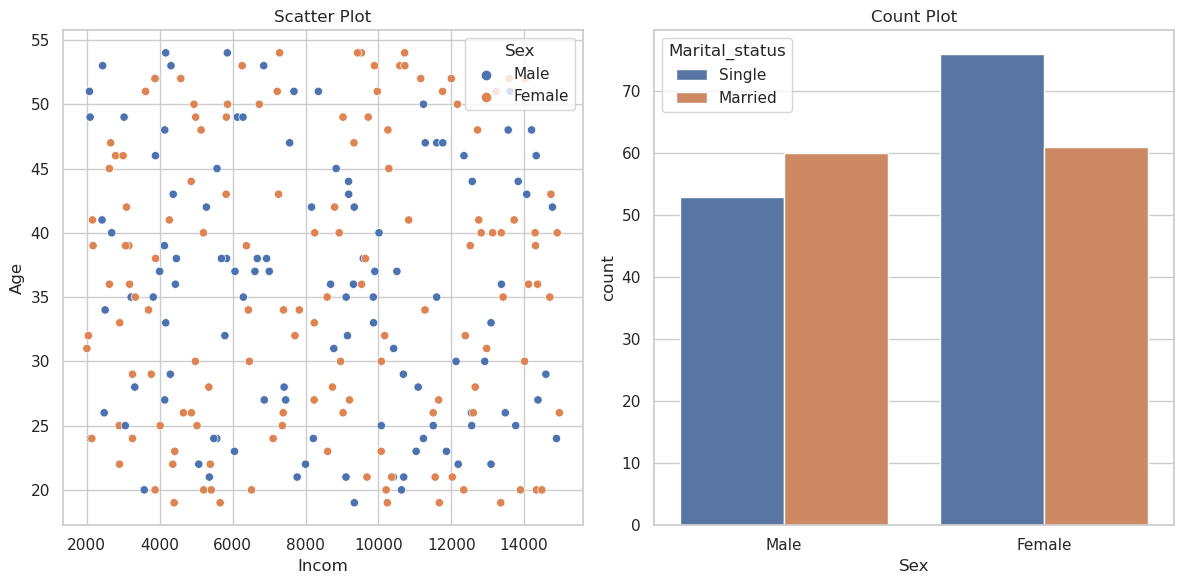

In [132]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  
sns.scatterplot(data=data,x=data['Incom'],y=data['Age'],hue=data['Sex'] )
plt.title('Scatter Plot')

plt.subplot(1, 2, 2)  
sns.countplot(data=data , x=data["Sex"],hue=data["Marital_status"])
plt.title('Count Plot')
plt.tight_layout()
plt.show()

Average income of people according to their education and income distribution by percentage according to their education

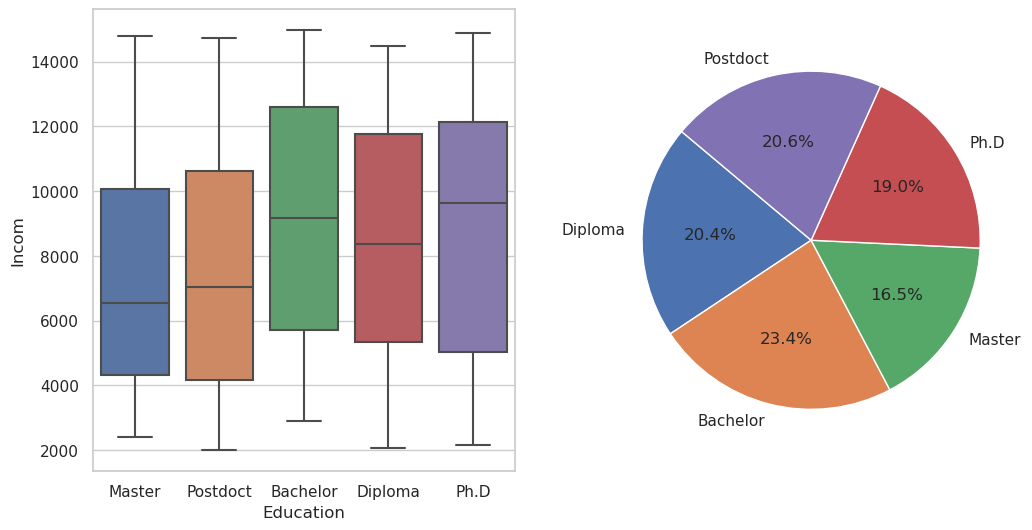

In [131]:
income_by_education = data.groupby('Education')['Incom'].sum()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  
sns.boxplot(data=data , x=data['Education'],y=data['Incom'])
plt.subplot(1, 2, 2)  
plt.pie(income_by_education, labels=Educational, autopct='%1.1f%%', startangle=140)
plt.show()